In [5]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from collections import OrderedDict

# 标准化数据 灰度数据 只需要转换一个层 的数字到 -1, 1 之间（方便计算）
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

x_train = datasets.FashionMNIST('data', download=True, transform=transform)  # 下载数据 执行张量转换
x_train_loader = torch.utils.data.DataLoader(x_train, batch_size=64, shuffle=True)

# 创建神经网络
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(784, 128)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(128, 64)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(64, 10)),
    ('softmax', nn.Softmax()),
]))

criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01) # 随机梯度下降，学习率0.01

epochs = 3

# 训练模型
for e in range(epochs):
    runing_loss = 0
    for images, labels in x_train_loader:
        
        images.resize_(images.shape[0], 784)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
    print('{} fashion'.format(e))


0 fashion
1 fashion
2 fashion


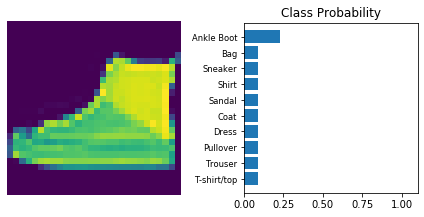

In [27]:
import helper
# 检测模型
images, labels = next(iter(x_train_loader))

img = images[2].view(1, 784)
with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)

helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')